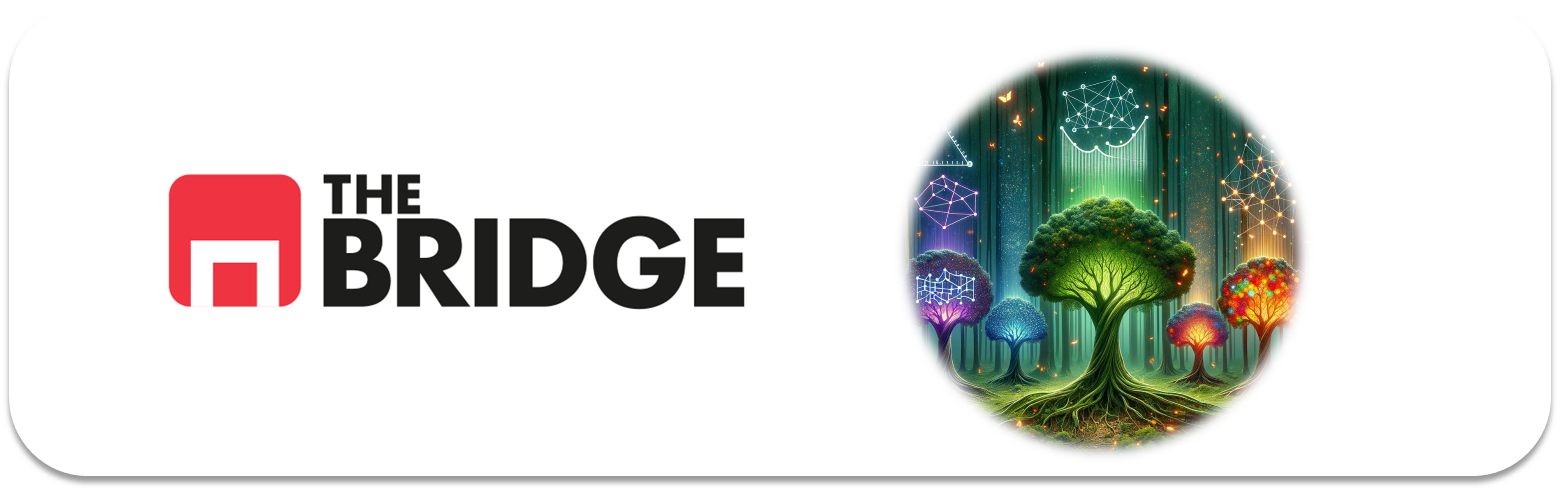

## PRACTICA OBLIGATORIA: **Ensamblado de modelos, bagging, boosting, random forest y gbts**

* La práctica obligatoria de esta unidad consiste en un único ejercicio de obtención del mejor modelo para la resolución de un problema de clasificación sobre diabetes en la india. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import bootcampviztools as bt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, classification_report, accuracy_score, ConfusionMatrixDisplay, make_scorer, accuracy_score, recall_score, precision_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree

### Descripción del dataset

El dataset de los Pima Indians Diabetes contiene datos de un grupo de mujeres de al menos 21 años de edad de ascendencia india Pima que viven cerca de Phoenix, Arizona, EE. UU. Las características del dataset incluyen varios predictores médicos y un objetivo que indica si la paciente desarrolló diabetes dentro de cinco años.

### Características del Dataset

Las variables incluidas en el dataset son:

1. **Número de Embarazos**: Cantidad de veces embarazada.
2. **Concentración de Glucosa en Plasma**: Concentración de glucosa en plasma a 2 horas en una prueba de tolerancia oral a la glucosa.
3. **Presión Arterial Diastólica**: Presión arterial diastólica (mm Hg).
4. **Grosor del Pliegue Cutáneo del Tríceps**: Grosor del pliegue cutáneo del tríceps (mm).
5. **Insulina en Suero**: Insulina en suero a 2 horas (mu U/ml).
6. **Índice de Masa Corporal**: Peso en kg/(altura en m)^2.
7. **Función del Pedigree de Diabetes**: Una función que representa la predisposición genética a la diabetes.
8. **Edad**: Edad en años.
9. **Variable Objetivo**: Indica si la paciente desarrolló diabetes (1) o no (0).

### Carga de datos

El dataset lo puedes encontrar en la siguiente url y a continuación se proporciona una lista de nombres sugeridos para las columnas:


In [3]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

In [4]:
df=pd.read_csv(url, names=names)
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Todos los valores están sin nulos y son variables de tipo numérico.

La target es ``class`` y es binaria, 1-0

### Enunciado

Construye el mejor modelo que puedas para predecir a partir de los datos de entrada si una mujer de la tribu Pima desarrollará diabetes. Para ello obtén al menoss tres modelos a partir de tecnologías de bagging y boosting (al menos uno de cada), compáralos sin utilizar el test y selecciona uno de ellos como el mejor (justificándolo). Termina el ejercicio probando el modelo seleccionado y con sus hiperparámetros optimizados contra un dataset de test que deberás haber reservado con anterioridad.

In [6]:
# split
train_set, test_set=train_test_split(df, test_size=0.2, random_state=42)

X_train=train_set.drop("class", axis=1)
y_train=train_set["class"]

X_test=test_set.drop("class", axis=1)
y_test=test_set["class"]

In [7]:
# distribucion de target
target=train_set["class"]
features=train_set.drop("class", axis=1)
train_set["class"].value_counts()


class
0    401
1    213
Name: count, dtype: int64

Text(0.5, 0, 'y')

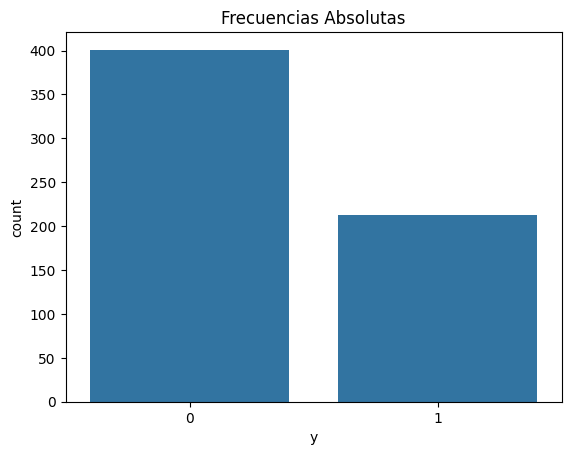

In [8]:
# Graficamos target
sns.countplot(x= y_train, data = train_set)
plt.title("Frecuencias Absolutas")
plt.xlabel("y")

Está algo descompensada

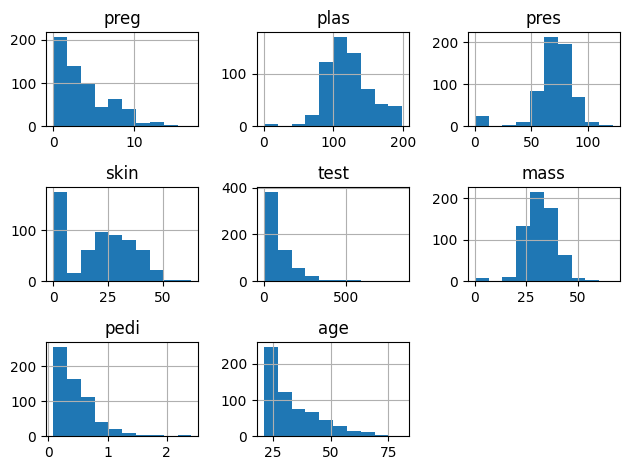

In [9]:
# analizamos las posibles features
features.hist()
plt.tight_layout()
plt.show()

In [10]:
# correlacion de las variables
corr = np.abs(train_set.corr(numeric_only=True)["class"]).sort_values(ascending = False)
corr

class    1.000000
plas     0.456117
mass     0.306335
age      0.280654
preg     0.207550
pedi     0.154560
test     0.108498
pres     0.082046
skin     0.057912
Name: class, dtype: float64

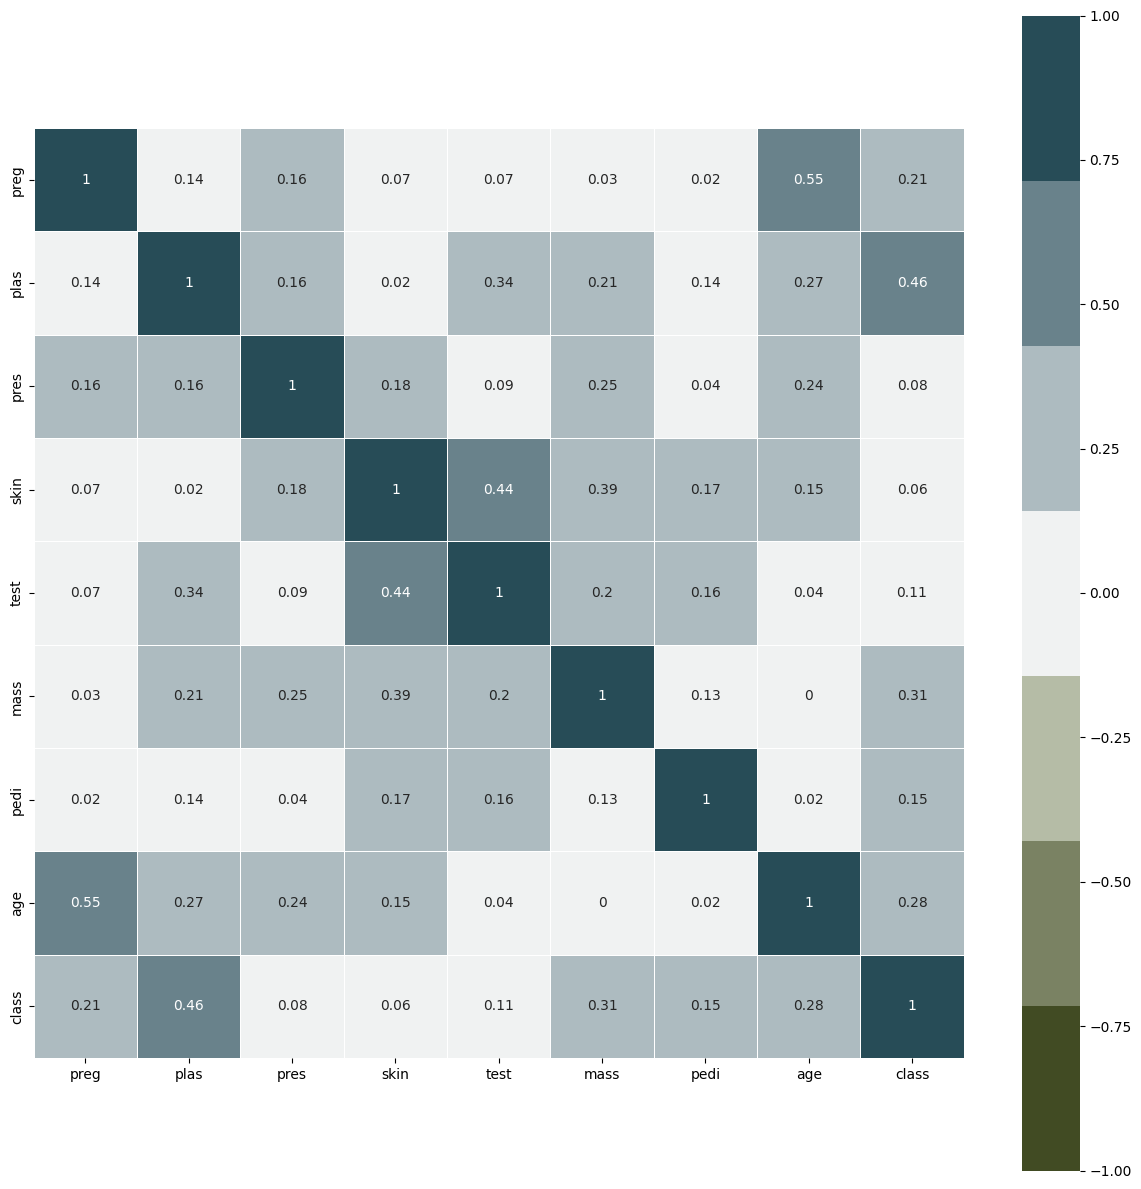

In [11]:
# Mapa de calor
plt.figure(figsize=(15,15))
sns.heatmap(np.round(np.abs(train_set.corr()), 2),
            vmin=-1,
            vmax=1,
            annot=True,
            cmap=sns.diverging_palette(100, 220, s=70, l=30, n=7),
            square=True,
            linewidths=.5);

In [12]:
train_set.columns

Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'], dtype='object')

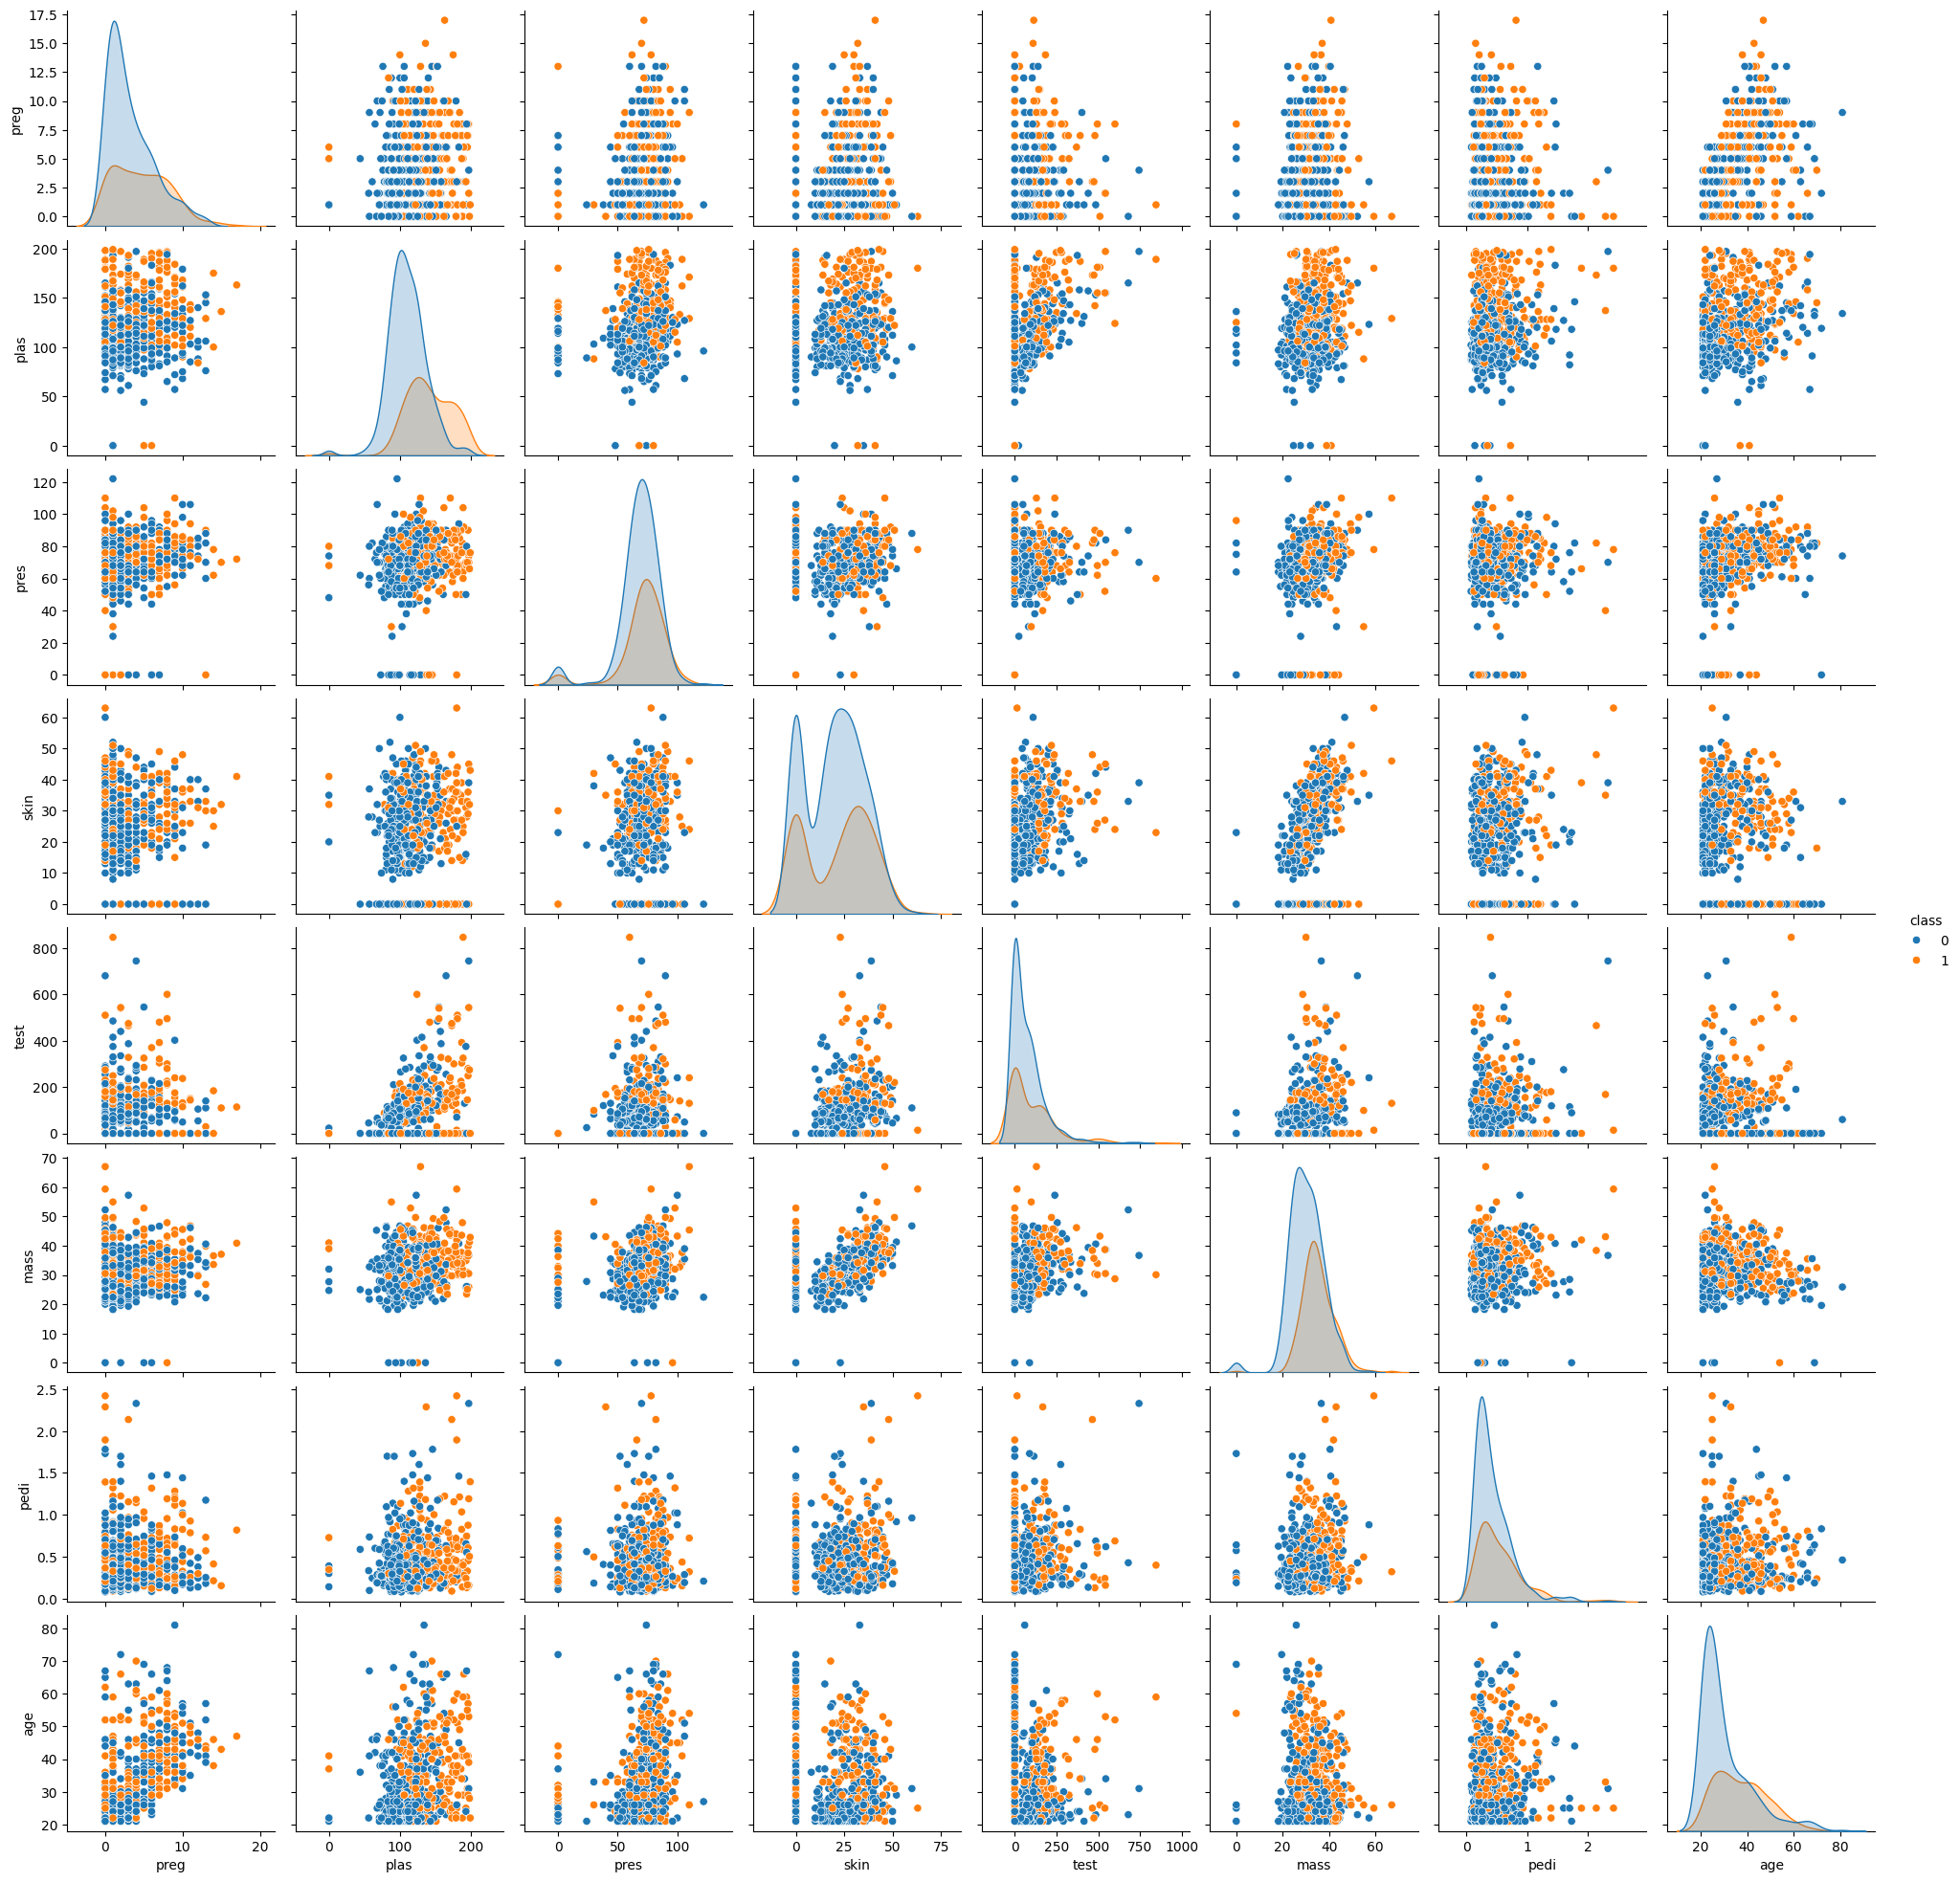

In [13]:
# Pairplot
sns.pairplot(train_set, hue="class") 

## BAGGING - 1

In [14]:
# RandomForest para la parte de bagging

# instancio objeto rf_clf
rnd_clf=RandomForestClassifier(n_estimators=500, max_depth=3, random_state=42)

# entreno
rnd_clf.fit(X_train, y_train)

# prediccion
y_pred=rnd_clf.predict(X_test)

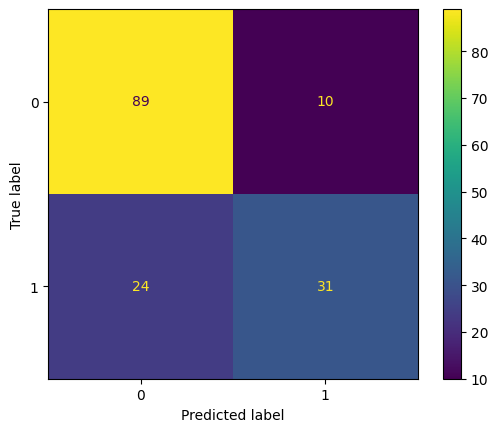

In [15]:
# Matriz de confusion

ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        99
           1       0.76      0.56      0.65        55

    accuracy                           0.78       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.78      0.78      0.77       154



Nos interesa la clase 1 (desarrollara diabetes). Al ser la muestra tan descompensada podemos obtener una accuracy bastante bueno, pero nos fijamos en el recall... nos gustaria que fuese mayor en el 1.

## BOOSTING - 1

In [17]:
# GradientBoostingClassifier

#instancio mi objeto
gbc=GradientBoostingClassifier()

#entrenamos
gbc.fit(X_train, y_train)

# Prediccion
y_pred=gbc.predict(X_test)

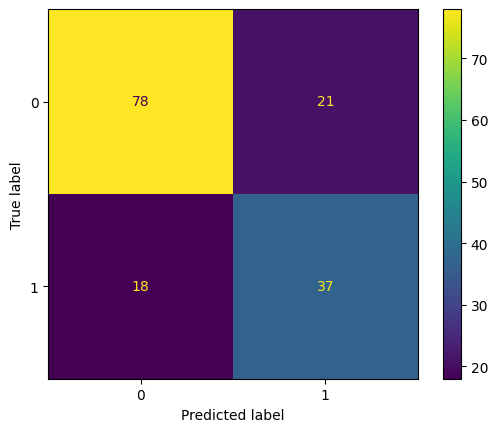

In [18]:
# Matriz de confusion

ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



Nuestros valores mejoran notablemente en recall 1 que nos interesa.

## BOOSTING - 2


In [37]:
# XGBClassifier
import xgboost
from xgboost import XGBClassifier

#instancio mi objeto
xgb_clf=xgboost.XGBClassifier(random_state=42)

#entrenamos
xgb_clf.fit(X_train, y_train)

# Prediccion
y_pred=xgb_clf.predict(X_test)

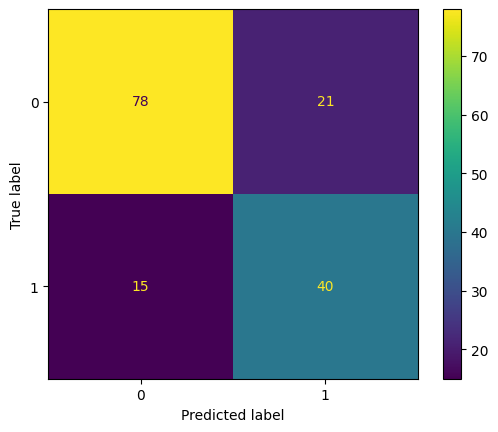

In [21]:
# Matriz de confusion

ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81        99
           1       0.66      0.73      0.69        55

    accuracy                           0.77       154
   macro avg       0.75      0.76      0.75       154
weighted avg       0.77      0.77      0.77       154



Mejora todavia más el valor recall 1

## Comparacion con validacion cruzada (previo)

In [38]:
# datos para cruzar
model_names = ["GradientBoost","Random Forest","XGBoost"]

gra_clf = GradientBoostingClassifier(random_state= 42)
rnd_clf = RandomForestClassifier(random_state= 42)
xgb_clf = xgboost.XGBClassifier(random_state = 42)

model_set = [gra_clf, rnd_clf, xgb_clf]

In [39]:
metricas_cv = {}
valores = []
for nombre,modelo in zip(model_names, model_set):
    print(modelo)
    if nombre != "Logistic Regression":
        metricas_cv[nombre] = cross_val_score(modelo, X_train, y_train, cv = 3, scoring = "balanced_accuracy")
    else:
        metricas_cv[nombre] = cross_val_score(modelo, X_train_scaled, y_train, cv = 3, scoring = "balanced_accuracy")
    valores.append(np.mean(metricas_cv[nombre]))
ganador = list(metricas_cv.keys())[np.argmax(valores)]

GradientBoostingClassifier(random_state=42)
RandomForestClassifier(random_state=42)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)


In [40]:
for model_name, valores in metricas_cv.items():
    print(f"Model <{model_name}>, Recall_CV: {np.mean(valores)}")
print(f"El ganador es {ganador}")

Model <GradientBoost>, Recall_CV: 0.7279842975106465
Model <Random Forest>, Recall_CV: 0.7274692933721733
Model <XGBoost>, Recall_CV: 0.7216917635691077
El ganador es GradientBoost


### Optimizacion del Ganador

In [49]:
params_grid = {
    'n_estimators': [100, 200, 300],           # Número de árboles en el ensamble
    'learning_rate': [0.01, 0.1, 0.2],         # Tasa de aprendizaje
    'max_depth': [3, 4, 5],                    # Profundidad máxima de los árboles
    'subsample': [0.8, 0.9, 1.0],              # Proporción de muestras utilizadas para ajustar cada árbol
    'colsample_bynode': [0.8, 0.9, 1.0],      # Proporción de características utilizadas para ajustar cada árbol
    'gamma': [0, 0.1, 0.2],                    # Mínima reducción de pérdida requerida para hacer una nueva partición en un nodo hoja
    'reg_alpha': [0, 0.1, 0.5],                # Término de regularización L1 en pesos
    'reg_lambda': [0, 0.1, 0.5]                # Término de regularización L2 en pesos
}

rf_grid = GridSearchCV(xgb_clf,
                       param_grid= params_grid,
                       cv = 3,
                       scoring = "balanced_accuracy",
                       n_jobs = -1)

rf_grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=0.8,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.01, max_...
                                     multi_strategy=None, n_estimators=100,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bynode': [0.8, 0.9, 1.0],
                         'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300],
                         'reg_alpha': [0, 0.1, 0.5],
                         'reg_lambda': [0, 0.1, 0.5],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='balanced_accuracy')

In [50]:
rf_grid.best_score_

0.7645981940345924

In [51]:
rf_grid.best_params_

{'colsample_bynode': 0.9,
 'gamma': 0.2,
 'learning_rate': 0.01,
 'max_depth': 5,
 'n_estimators': 300,
 'reg_alpha': 0.1,
 'reg_lambda': 0.1,
 'subsample': 0.8}

              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



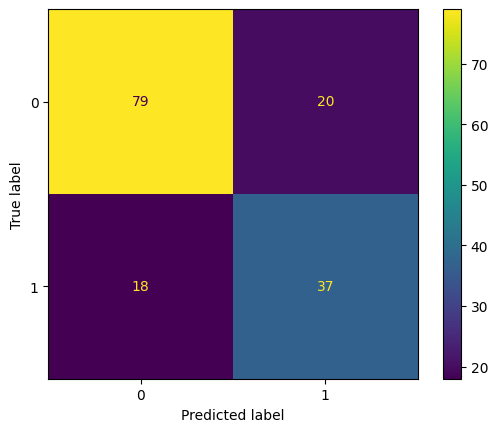

In [52]:
y_pred = rf_grid.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [30]:
{'colsample_bynode': 0.9,
 'gamma': 0.2,
 'learning_rate': 0.01,
 'max_depth': 5,
 'n_estimators': 300,
 'reg_alpha': 0.1,
 'reg_lambda': 0.1,
 'subsample': 0.8}

{'colsample_bynode': 0.8,
 'gamma': 0,
 'learning_rate': 0.01,
 'max_depth': 3,
 'n_estimators': 100,
 'reg_alpha': 0,
 'reg_lambda': 0,
 'subsample': 0.8}

In [53]:
# Xboost para la parte de bagging con los valores optimizados

# instancio objeto xgb_clf
xgb_clf=xgboost.XGBClassifier(colsample_bynode= 0.9,
 gamma= 0.2,
 learning_rate= 0.01,
 max_depth=5,
 n_estimators= 300,
 reg_alpha= 0.1,
 reg_lambda= 0.1,
 subsample= 0.8, random_state=42)

# entreno
xgb_clf.fit(X_train, y_train)

# prediccion
y_pred=xgb_clf.predict(X_test)

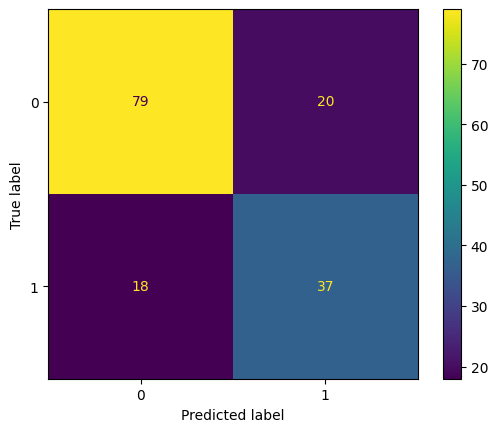

In [54]:
# Matriz de confusion

ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [55]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



No entiendo bien, por que los valores han empeorado...